# Lab 2 : MK Titanic Data Analysis
**Author:** Mahitha 

**Date:** March, 20, 2025 

**Objective:** This project analyzes the Titanic dataset to explore passenger characteristics and survival patterns. It includes data inspection, exploration, cleaning, feature engineering, and splitting for machine learning, using Python with pandas, seaborn, matplotlib, and scikit-learn.


In [34]:
# Import pandas for data manipulation and analysis. 
import pandas as pd

# Import pandas for data manipulation and analysis.
import numpy as np

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import the California housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split

# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Import Pandas Plotting and Scatter Matrix
from pandas.plotting import scatter_matrix

# Import Stratified Shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Section 1. Import and Inspect the Data

In [35]:
# 1.1 Load the dataset and display the first 10 rows
# 1. load the Titanic dataset directly from seaborn.
titanic = sns.load_dataset('titanic')

# 2. Display basic information about the dataset:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [36]:

## 3.Display the first 10 rows:
print(titanic.head(n=10))

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

In [37]:
# 1.2 Check for missing values and display summary statistics
# 1.Display basic summary statistics

titanic.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [38]:
#1. Display basic summary statistics:
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [39]:
#2. Check for correlations:
print(titanic.corr(numeric_only=True))

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


Reflection 1:
1) How many data instances are there? 891
2) How many features are there? 15
3) What are the names? survived, pclass, sex, age,sibsp , parch, fare, embarked,  class, who , adult_male, deck,  embark_town ,alive,  alone
4) Are there any missing values? yes, 177 in age, 2 in embarked, 688 in deck, 2 in embark_town
5) Are there any non-numeric features? Yes
6) Are the data instances sorted on any of the attributes? No
7) What are the units of age? Years
8) What are the minimum, median and max age?0.4, 28.0, 80
9) What two different features have the highest correlation? parch with sibsp with a correlation of 0.414838
10) Are there any categorical features that might be useful for prediction? ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']

### Section 2. Data Exploration and Preparation
 2.1 Explore data patterns and distributions 

1. Use a scatter matrix to visualize feature relationships and distributions:

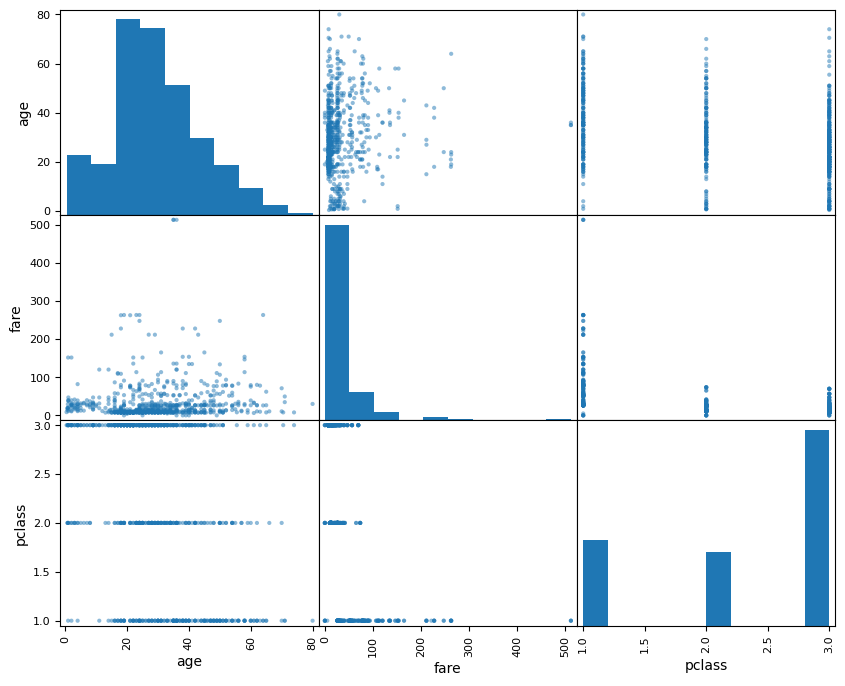

In [40]:
from pandas.plotting import scatter_matrix

attributes = ['age', 'fare', 'pclass']
# Plot the scatter matrix
scatter_matrix(titanic[attributes], figsize=(10, 8), diagonal='hist')

# Show the plot
plt.show()


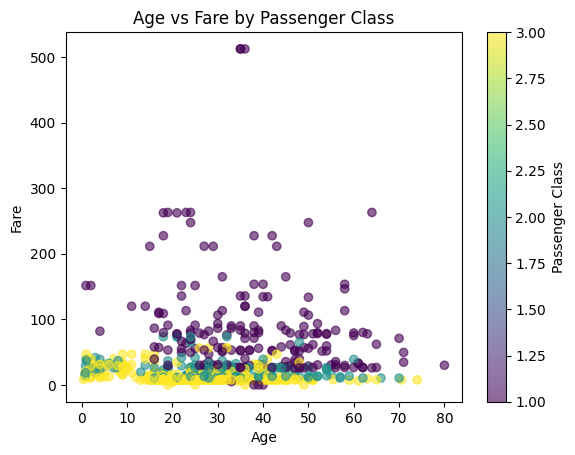

In [41]:
import matplotlib.pyplot as plt

# Scatter plot of Age vs Fare, with color coding based on 'pclass'
plt.scatter(titanic['age'], titanic['fare'], c=titanic['pclass'], cmap='viridis', alpha=0.6)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Passenger Class')

# Show colorbar for passenger class
plt.colorbar(label='Passenger Class')

# Show the plot
plt.show()

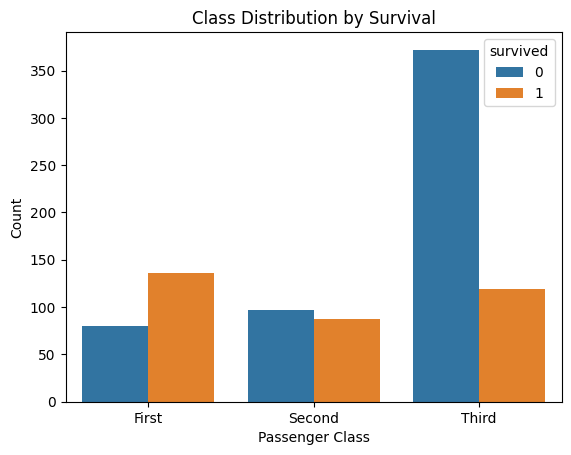

In [42]:
# Create a count plot for class and survival:

sns.countplot(x='class', hue='survived', data=titanic)
# Adding labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Class Distribution by Survival')
plt.show()

### 2.2 Handle Missing Values and Clean Data

In [44]:
# Age was missing values. 
# We can impute missing values for age using the median:
titanic.loc[:, 'age'] = titanic['age'].fillna(titanic['age'].median())
 
# Embark_town was missing values.
# We can drop missing values for embark_town (or fill with mode):
titanic.loc[:, 'embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

### 2.3 Feature Engineering

In [47]:
# Convert 'sex' to numeric (0 = male, 1 = female)
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

# Create a new feature: Family size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

In [48]:
def age_category(age):
    if age <= 12:
        return 'Child'
    elif 12 < age <= 19:
        return 'Teenager'
    elif 19 < age <= 60:
        return 'Adult'
    else:
        return 'Senior'

titanic['age_category'] = titanic['age'].apply(age_category)
titanic['fare_per_person'] = titanic['fare'] / titanic['family_size']
## Display the first 10 rows:
print(titanic.head(n=10))

   survived  pclass  sex   age  sibsp  parch     fare embarked   class    who  \
0         0       3    0  22.0      1      0   7.2500        S   Third    man   
1         1       1    1  38.0      1      0  71.2833        C   First  woman   
2         1       3    1  26.0      0      0   7.9250        S   Third  woman   
3         1       1    1  35.0      1      0  53.1000        S   First  woman   
4         0       3    0  35.0      0      0   8.0500        S   Third    man   
5         0       3    0  28.0      0      0   8.4583        Q   Third    man   
6         0       1    0  54.0      0      0  51.8625        S   First    man   
7         0       3    0   2.0      3      1  21.0750        S   Third  child   
8         1       3    1  27.0      0      2  11.1333        S   Third  woman   
9         1       2    1  14.0      1      0  30.0708        C  Second  child   

   adult_male deck  embark_town alive  alone  family_size age_category  \
0        True  NaN  Southampton   

### Section 3. Feature Selection and Justification

3.1 Choose two input features for predicting the target

1. Select two or more input features (numerical for regression, numerical and/or categorical for classification)

2. Select a target variable (as applicable) Classification: Categorical target variable (e.g., gender, species). Justify your selection with reasoning.

For classification, we’ll use 'survived' as the target variable.

3. Input features: age, fare, pclass, sex, family_size

4. Target: 'survived'


### 3.2 Define X and y
1.Assign input features to X

2.Assign target variable to y (as applicable)

In [ ]:
#### Select input features (X) and target variable (y)
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]  # Input features
y = titanic['survived']  # Target variable

Reflection 3:
Why are these features selected?
* These have logical potential for high correlations (ex. higher age or very low age = less likely to survive, higher fare = more priority to safety = more likely to survive) 
* Are there any features that are likely to be highly predictive of survival? *  age, pclass, and family_size

### Section 4. Splitting
Split the data into training and test sets using train_test_split first and StratifiedShuffleSplit second. Compare.

In [56]:
# Basic Train/Test split 

# Split the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('Train size:', len(X_train))
print('Test size:', len(X_test))

Train size: 712
Test size: 179


In [58]:
# Stratified Train/Test split
 
# Split the data into training and test sets
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

# Now you can proceed to check the class distributions
print("Original Class Distribution:\n", y.value_counts(normalize=True))

# Print the class distribution of 'pclass' in the training set
print("Train Set Class Distribution:\n", train_set['pclass'].value_counts(normalize=True))

# Print the class distribution of 'pclass' in the test set
print("Test Set Class Distribution:\n", test_set['pclass'].value_counts(normalize=True))

Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64


#### Reflection 4:
#### Why might stratification improve model performance?

- It helps prevent sampling bias that occurs with random splitting.
- Stratification is especially helpful in imbalanced datasets (like Titanic, where survival is not 50/50).

#### How close are the training and test distributions to the original dataset?

- The stratified split maintains almost exact proportions of classes as in the original dataset.
- The regular split might show more variation from the original proportions.

#### Which split method produced better class balance?

- The stratified split method produces better class balance because it explicitly preserves the original class proportions.
- Stratified split reduces sampling bias and is more reliable for model evaluation, especially with imbalanced data like the Titanic dataset.
